In [16]:
import pickle as pkl
import torch.nn.functional as F
import numpy as np

In [17]:
with open('/root/seg_framework/MS-Mamba/image_6.pkl', 'rb') as f:
    image = pkl.load(f)

with open('/root/seg_framework/MS-Mamba/target_6.pkl', 'rb') as f:
    target = pkl.load(f)

with open('/root/seg_framework/MS-Mamba/output_6.pkl', 'rb') as f:
    pred = pkl.load(f)

/root/anaconda3/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [18]:
#Convert to numpy
image = image.cpu().numpy()
target = target.cpu().numpy()

In [19]:
#Pred to binary mask
pred = F.sigmoid(pred)
pred = (pred > 0.5).float()
pred = pred.cpu().numpy()

In [20]:
np.shape(image), np.shape(target), np.shape(pred)

((2, 2, 3, 176, 224, 176), (2, 1, 176, 224, 176), (2, 1, 176, 224, 176))

In [21]:
target = target.squeeze(1)
pred = pred.squeeze(1)

In [22]:
idx = 100

In [23]:
image_slice1 = image[0, 0, 0, :, idx, :]
image_slice2 = image[0, 1, 0, :, idx, :]


In [24]:
target_slice1 = target[0,:, idx, :]
target_slice2 = target[1,:, idx, :]
# target_slice3 = target[2,:, idx, :]
# target_slice4 = target[3,:, idx, :]

In [25]:
pred_slice1 = pred[0,:, idx, :]
pred_slice2 = pred[1,:, idx, :]
# pred_slice3 = pred[2,:, idx, :]
# pred_slice4 = pred[3,:, idx, :]

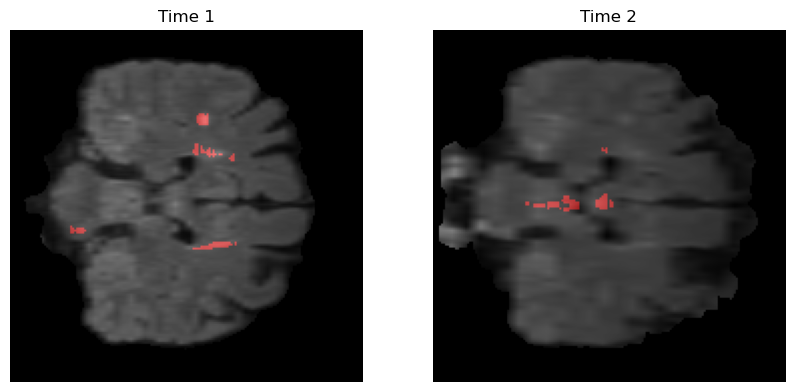

In [26]:
import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# List of image slices and target slices
image_slices = [image_slice1, image_slice2]
target_slices = [target_slice1, target_slice2]

# Titles for subplots
titles = ['Time 1', 'Time 2']

for i in range(2):
    # Overlay the target mask on the image slice with transparency
    axs[i].imshow(image_slices[i], cmap='gray')
    axs[i].imshow(np.dstack((target_slices[i], np.zeros_like(target_slices[i]), np.zeros_like(target_slices[i]))), 
                  cmap='Reds', alpha=0.5)  # Red mask with 50% transparency
    axs[i].set_title(titles[i])
    axs[i].axis('off')

# Display the plots
plt.show()

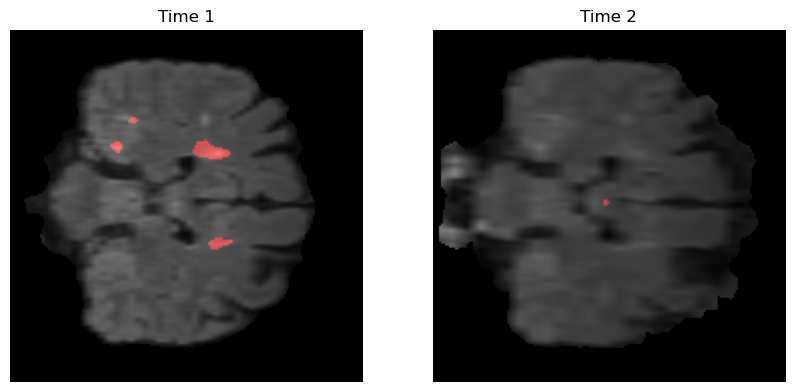

In [27]:
import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# List of image slices and target slices
image_slices = [image_slice1, image_slice2]
pred_slices = [pred_slice1, pred_slice2]

# Titles for subplots
titles = ['Time 1', 'Time 2']

for i in range(2):
    # Overlay the target mask on the image slice with transparency
    axs[i].imshow(image_slices[i], cmap='gray')
    axs[i].imshow(np.dstack((pred_slices[i], np.zeros_like(target_slices[i]), np.zeros_like(target_slices[i]))), 
                  cmap='Reds', alpha = 0.5)  # Red mask with 50% transparency
    axs[i].set_title(titles[i])
    axs[i].axis('off')

# Display the plots
plt.show()

In [1]:
import os
data_dir = '/root/MSLesSeg24/UCSF-ALPTDG/'

#list directories in data_dir and sort them
files = os.listdir(data_dir)
files.sort()

In [3]:
len(files)

177

In [8]:
import os
data_dir = '/root/MSLesSeg24/UCSF-ALPTDG/'

#list directories in data_dir and sort them
files = os.listdir(data_dir)
files.sort()

In [9]:
len(files)

177

In [ ]:
np.save('/root/seg_framework/MS-Mamba/dataset/patients_ucsf.npy', files)

In [5]:
import numpy as np

In [6]:
files = np.load('/root/seg_framework/MS-Mamba/dataset/patients_ucsf.npy')

In [7]:
len(files)

56

In [3]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manyl

In [6]:
import torch

# Simulate output_agg with shape [3, 218, 218, 218]
output_agg = torch.zeros([3, 218, 218, 218])

# Simulate slice_output with shape [1, 218, 218]
slice_output = torch.zeros([1, 218, 218])

# axis and c % res (assuming both are valid indices)
axis = 0
c = 1
res = 1  # Example modulus result

# This line does not throw an error due to broadcasting
output_agg[axis][c % res] = torch.unsqueeze(slice_output.float(), dim=0)


RuntimeError: expand(torch.FloatTensor{[2, 218, 218]}, size=[218, 218]): the number of sizes provided (2) must be greater or equal to the number of dimensions in the tensor (3)

In [5]:
import numpy as np

values = [0.8505, 0.8518, 0.8508]

#find mean and std
mean = np.mean(values)
std = np.std(values)
print(mean, std)

0.8510333333333334 0.0005557777333510921
